<div style='padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Free Oscillations</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Instrument response and spectral analysis</div>
        </div>
    </div>
</div>

## Import Libraries

In [1]:
# Preparation for programming
# Make sure to execute this cell first!
%matplotlib inline

# do not show warnings
import warnings
warnings.filterwarnings('ignore')   

import numpy as np
import matplotlib.pylab as plt

# from IPython.display import display, Math, Latex
# from time import *
# from obspy import *
from obspy.core import read, UTCDateTime, Stream
from obspy.clients.fdsn import Client, RoutingClient
from obspy.signal.filter import lowpass
from matplotlib.mlab import detrend
from obspy.signal.invsim import cosine_taper 
from obspy.imaging.beachball import beach

plt.style.use('ggplot')

## Configurations

In [2]:
## sumatra earthquake
# t_origin = UTCDateTime("2004-12-26T00:58:53.0")   

## tohoku earthquake
t_origin = UTCDateTime("2011-03-11T05:46:0.0"); event = 'tohoku'

## Kermadec earthquake
# t_origin = UTCDateTime("2021-03-04T18:40:0.0"); event = 'kermadec' 


stations = ["*.CAN.*.LHZ", "GR.BFO.*.LHZ", "GR.WET.*.LHZ", "BW.RLAS.*.BJZ"]
clients  = ["IRIS", "BGR", "BGR", "LMU"]

# stations = ["*.CAN.*.LHZ", "GR.BFO.*.LHZ", "GR.FUR.*.LHZ", "BW.ROMY.10.BJZ"]
# clients  = ["IRIS", "BGR", "BGR","http://george"]


starttime = t_origin - (24*3600*0.1)             
endtime   = t_origin + (24*3600*2.0) 



## as modelled by RPEM in muHz
free_modes = {'0S2':309.28, '0S3':468.56, '0S4':647.07, '1S2':679.85, '0S0':814.31, 
              '0S5':840.42, '1S3':939.83, '3S1':943.95}

## Import Data

In [3]:

net, sta, loc, cha = [], [], [], []

st0  = Stream()

for i, station in enumerate(stations):

    print("loading  " + station)
    
    net.append(station.split(".")[0]) 
    sta.append(station.split(".")[1])
    loc.append(station.split(".")[2])
    cha.append(station.split(".")[3])

    client = Client(clients[i])

    try:
        st00 = client.get_waveforms(
                                    network=net[i],
                                    station=sta[i],
                                    location=loc[i],
                                    channel=cha[i], 
                                    starttime=starttime-1, 
                                    endtime=endtime+1, 
#                                     attach_response=True,
                                    )
        
        if len(st00) > 1:
            st00.merge() 
            
        st0 += st00
        del st00  

    except:
        print("no data obtained !")
    
      
    
    try:

        inv = client.get_stations(
                                  network=net[i],
                                  station=sta[i],
                                  location=loc[i],
                                  channel=cha[i],
                                  level="response", 
                                  starttime=starttime,
                                  endtime=endtime,
                                 )
    except:
        print("no inventory found!")
     
    try:
        if cha[i][1] == "J":
            st0[i].remove_response(inventory=inv)[0]

        else:
            st0[i].remove_response(inventory=inv, output="ACC", plot=False)[0]
            
    except:
        print("response could not be removed!")

     
    if cha[i][0] == "B":
        st0[i].detrend(
            'linear')
#         st0[i].taper(0.01)
        st0[i].resample(1.0)
        st0[i].stats.channel = f"L{st0[i].stats.channel[1:]}"
    
    ## assure all traces have the same time window (that's why +-1 second is requested)
    st0[i].trim(starttime, endtime)
    
## make copy of st0
st = st0.copy()


# st.plot();

loading  *.CAN.*.LHZ


1.3479859816680685e-07

G.CAN.00.LHZ | 2011-03-11T03:22:00.069538Z - 2011-03-13T05:46:00.069538Z | 1.0 Hz, 181441 samples

loading  GR.BFO.*.LHZ


1.9966386936632236e-07

GR.BFO..LHZ | 2011-03-11T03:22:00.296160Z - 2011-03-13T05:46:00.296160Z | 1.0 Hz, 181441 samples

loading  GR.WET.*.LHZ


5.815274545393367e-09

GR.WET..LHZ | 2011-03-11T03:21:59.974999Z - 2011-03-13T05:45:59.974999Z | 1.0 Hz, 181441 samples

loading  BW.RLAS.*.BJZ


-2.877995833138614e-14

BW.RLAS..BJZ | 2011-03-11T03:21:59.000900Z - 2011-03-13T05:46:01.000900Z | 20.0 Hz, 3628841 samples

BW.RLAS..BJZ | 2011-03-11T03:21:59.000900Z - 2011-03-13T05:46:00.000900Z | 1.0 Hz, 181442 samples

BW.RLAS..LJZ | 2011-03-11T03:22:00.000900Z - 2011-03-13T05:46:00.000900Z | 1.0 Hz, 181441 samples

In [4]:
st

4 Trace(s) in Stream:
G.CAN.00.LHZ | 2011-03-11T03:22:00.069538Z - 2011-03-13T05:46:00.069538Z | 1.0 Hz, 181441 samples
GR.BFO..LHZ  | 2011-03-11T03:22:00.296160Z - 2011-03-13T05:46:00.296160Z | 1.0 Hz, 181441 samples
GR.WET..LHZ  | 2011-03-11T03:21:59.974999Z - 2011-03-13T05:45:59.974999Z | 1.0 Hz, 181441 samples
BW.RLAS..LJZ | 2011-03-11T03:22:00.000900Z - 2011-03-13T05:46:00.000900Z | 1.0 Hz, 181441 samples

### Calculating spectra of traces

In [5]:

def __make_spectra_fft(st):
    

    specs = []    
    for j in st:
        
        print(j.data.size)
        
        y_tapered = j.data * cosine_taper(j.data.size, 0.1)     # Define cosine taper to be used
#         y_tapered = j.data * np.hanning(j.data.size)
        
        y_detrend = detrend(y_tapered, 'linear')
        
        y_fnew = np.fft.rfft(y_detrend)
        
#         y_pad = np.lib.pad(y_detrend, 
#                            (92289, 92289),
#                            'constant',
#                            constant_values=(0,0),
#                           )
        
#         y_fpad= np.fft.rfft(y_pad)
    
        specs.append(abs(y_fnew))
        
    freqs = np.linspace(0, 0.5*st[0].stats.sampling_rate, len(specs[0]))         
        
    return specs, freqs


In [6]:
specs, freqs = __make_spectra_fft(st)       

181441
181441
181441
181441


In [7]:

def __make_spectra_welch(st, nsegments=int(100*4096)):
    
    from scipy.signal import welch

  

    specs = []    
    for j in st:
        
        print(j.data.size)
        
        psd = welch(
                    j.data,
                    fs=j.stats.sampling_rate,
                    window='hann',
                    nperseg=nsegments,
                    noverlap=None,
                    nfft=None,
                    detrend='constant',
                    return_onesided=True,
                    scaling='spectrum',
                    average='mean',
                    )
    
        specs.append(psd[1])
        
    freqs = psd[0]        
        
    return specs, freqs


In [8]:
wspecs, wfreqs = __make_spectra_welch(st)       

181441
181441
181441
181441


In [9]:

def __make_spectra_MT(st, method="unity"):
    
    from spectrum import data_cosine, dpss, pmtm

    window_length = st[0].stats.npts
    time_half_bandwidth = 2.5
    first_k_slepian_sequences = 4
    
    [tapers, eigen] = dpss(window_length, time_half_bandwidth, first_k_slepian_sequences)
    
    specs = []    
    for j in st:
        
        print(j.data.size)
        
        
        if method == 'unity':
            
            ## call pmtm function of spectrum library
            sk_complex, weights, eigen = pmtm(j.data, e=eigen, v=tapers, show=False, method='unity')

            ## right scaling
            sk = abs(sk_complex)**2
            
            ## redefine weithgts, since wrong in dimension
            weights = np.transpose(np.ones(np.shape(sk)))

            ## multiply output sk matrix and weights matrix and average rows 
            out = np.mean(np.matmul(weights,sk), axis=0)            
            
            
        elif method == 'adapt':
            
            ## call pmtm function of spectrum library
            sk_complex, weights, eigen = pmtm(j.data, e=eigen, v=tapers, show=False, method='adapt')

            ## multiply output sk matrix and weights matrix and average rows 
            
            ## right scaling            
            sk = abs(sk_complex)**2
            
            ## multiply output sk matrix and weights matrix and average rows             
            out = np.mean(np.matmul(weights,sk), axis=1)

        ## return one-sided spectrum
        out = out[:window_length//2]
        
    ## gather outputs
    specs.append(out)
    del out
    
    ## generate frequency axius
    freqs = np.linspace(0, 0.5*st[0].stats.sampling_rate, len(specs[0]))         
    
    return specs, freqs


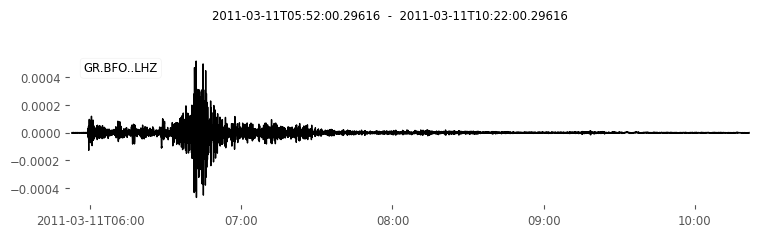

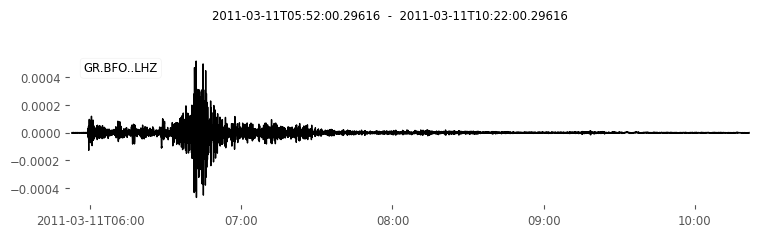

16201


In [10]:
st1 = st.copy()
tmp = st1[1].trim(st1[3].stats.starttime+2.5*3600, st1[3].stats.starttime+7*3600)
test = Stream(tmp)
test.plot()
specsMT, freqsMT = __make_spectra_MT(test, method="unity")

(0.0005, 0.004)

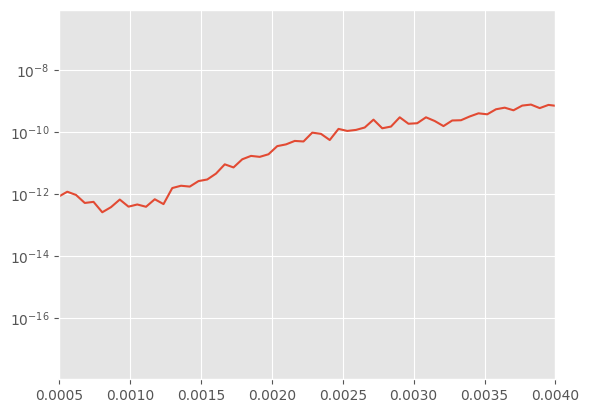

In [11]:
plt.semilogy(freqsMT, specsMT[0])
plt.xlim(0.0005,0.004)

### Plotting Traces

G.CAN.00.LHZ | 2011-03-11T03:22:00.069538Z - 2011-03-13T05:46:00.069538Z | 1.0 Hz, 181441 samples
GR.BFO..LHZ | 2011-03-11T03:22:00.296160Z - 2011-03-13T05:46:00.296160Z | 1.0 Hz, 181441 samples
GR.WET..LHZ | 2011-03-11T03:21:59.974999Z - 2011-03-13T05:45:59.974999Z | 1.0 Hz, 181441 samples
BW.RLAS..LJZ | 2011-03-11T03:22:00.000900Z - 2011-03-13T05:46:00.000900Z | 1.0 Hz, 181441 samples


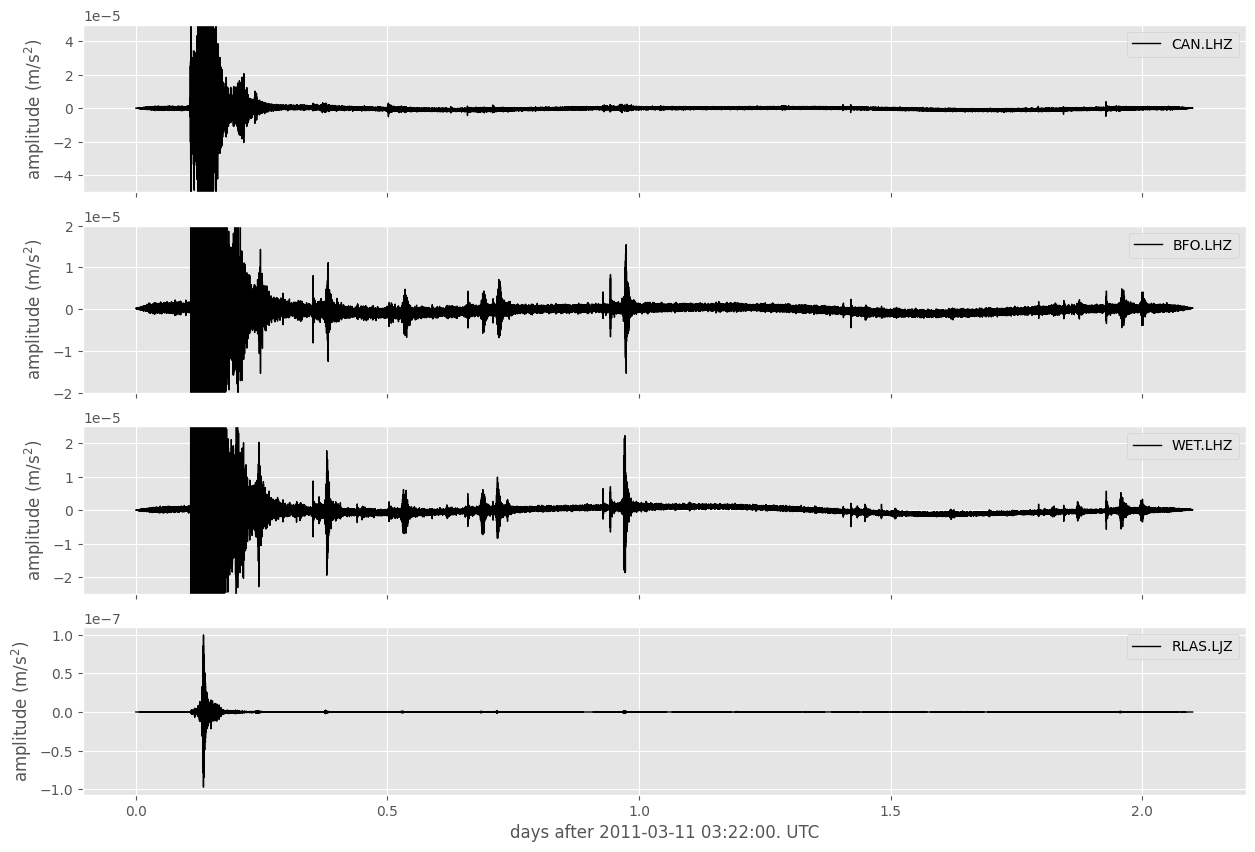

In [12]:
def __makeplot_traces():
    
    time = np.linspace(0, st[0].stats.npts*st[0].stats.delta,  st[0].stats.npts)
    
    N = len(stations)
    
    fig, ax = plt.subplots(N,1, figsize=(15,10), sharex=True)

    for i in range(N):
        print(st[i])
        
        ax[i].plot(time/24/3600, st[i].data, 'k', label=f"{st[i].stats.station}.{st[i].stats.channel}", lw=1)
        
        ax[i].set_ylabel(r"amplitude (m/s$^2$)")

        ax[i].legend(loc="upper right")
    
    ## Kermadec
    ax[0].set_ylim(-5e-5, 5e-5)
    ax[1].set_ylim(-2e-5, 2e-5)
    ax[2].set_ylim(-2.5e-5, 2.5e-5)
#     ax[3].set_ylim(-1e-10, 1e-10)
    
    ## Tohoku
#     ax[0].set_ylim(-5e-5, 5e-5)
#     ax[1].set_ylim(-2e-5, 2e-5)
#     ax[2].set_ylim(-2.5e-5, 2.5e-5)
#     ax[3].set_ylim(-1e-11, 1e-11)    
    
    ax[N-1].set_xlabel(f"days after {st[0].stats.starttime.date} {str(st[0].stats.starttime.time)[:9]} UTC")
    
    plt.show();

    
__makeplot_traces()      

### Plotting spectra

*.CAN.*.LHZ
GR.BFO.*.LHZ
GR.WET.*.LHZ
BW.RLAS.*.BJZ


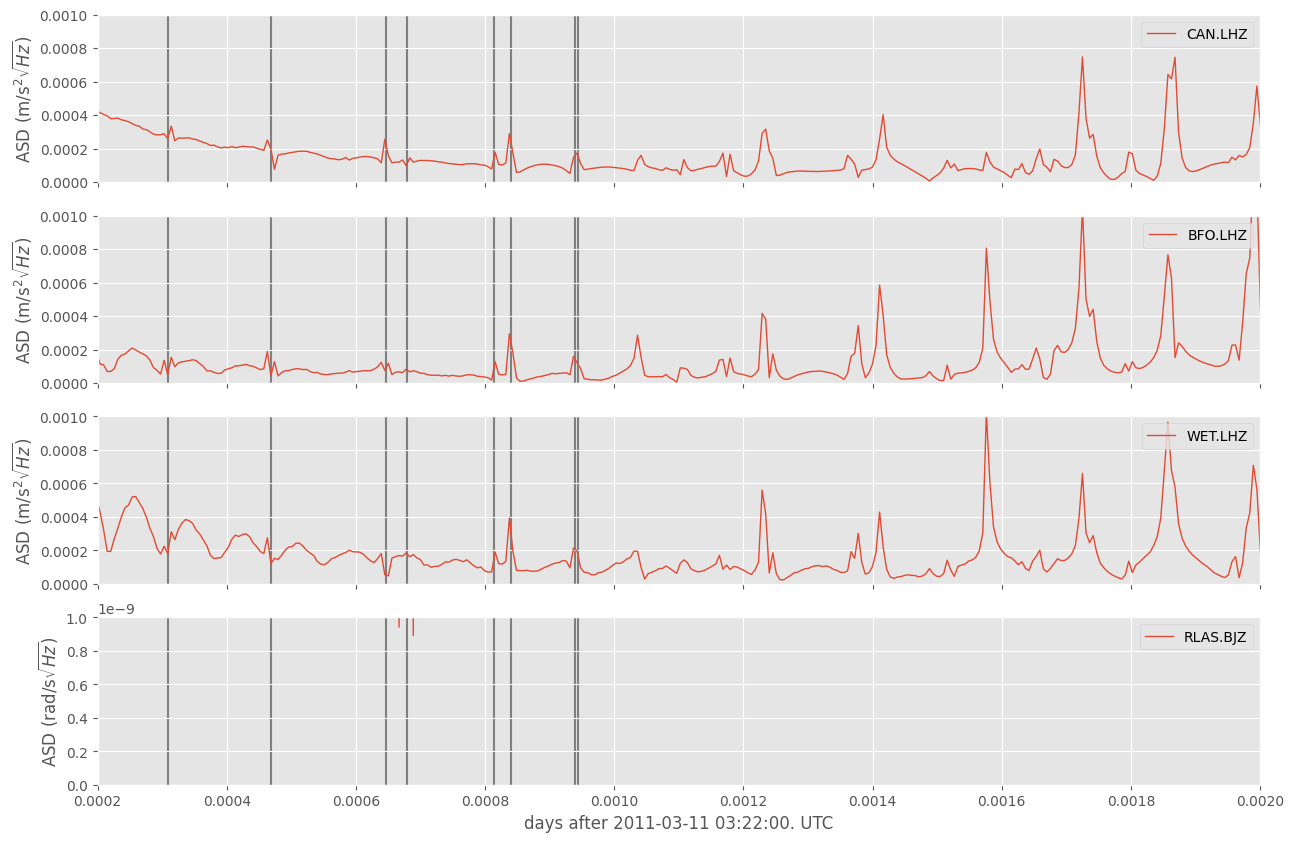

In [13]:
def __makeplot_spectra(freqs, specs):

    
    time = np.linspace(0, st[0].stats.npts*st[0].stats.delta,  st[0].stats.npts)
    
    N = len(stations)
    
    fig, ax = plt.subplots(N,1, figsize=(15,10), sharex=True)

    for i, station in enumerate(stations):
        print(station)
        
        net, sta, loc, cha = station.split(".")
        
        ax[i].plot(freqs, specs[i], label=f'{sta}.{cha}', lw=1)
                  
        if cha[1] == "J":
            ax[i].set_ylabel(r"ASD (rad/s$\sqrt{Hz}$)")
        else:
            ax[i].set_ylabel(r"ASD (m/s$^2$$\sqrt{Hz}$)")

        ax[i].legend(loc="upper right")
    
        ax[i].set_xlim(0.2e-3, 2e-3)
    
        for mode in free_modes.values():
            ax[i].axvline(mode*1e-6, color='grey', zorder=0)
    
    if event == 'kermadec':
        ax[0].set_ylim(0, 0.0004)
        ax[1].set_ylim(0, 0.0002)
        ax[2].set_ylim(0, 0.0006)
        ax[3].set_ylim(0, 0.5e-9)

    if event == 'tohoku':
        ax[0].set_ylim(0, 0.001)
        ax[1].set_ylim(0, 0.001)
        ax[2].set_ylim(0, 0.001)
        ax[3].set_ylim(0, 1e-9)
    
    ax[N-1].set_xlabel(f"days after {st[0].stats.starttime.date} {str(st[0].stats.starttime.time)[:9]} UTC")
    
    plt.show();
    

__makeplot_spectra(freqs, specs)

*.CAN.*.LHZ
GR.BFO.*.LHZ
GR.WET.*.LHZ
BW.RLAS.*.BJZ


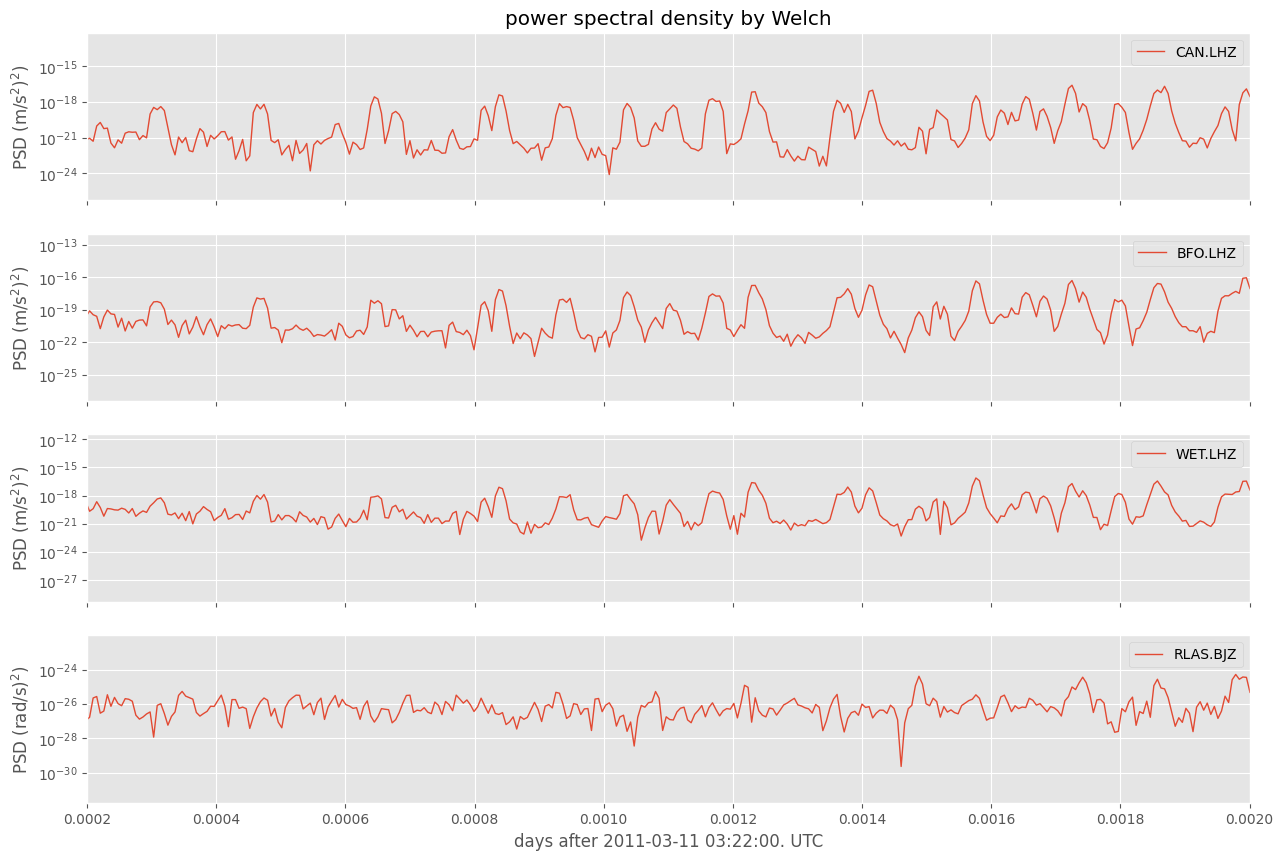

In [14]:
def __makeplot_spectra2(freqs, specs):

    
    time = np.linspace(0, st[0].stats.npts*st[0].stats.delta,  st[0].stats.npts)
    
    N = len(stations)
    
    fig, ax = plt.subplots(N,1, figsize=(15,10), sharex=True)

    for i, station in enumerate(stations):
        print(station)
        
        net, sta, loc, cha = station.split(".")
        
        ax[i].semilogy(freqs, specs[i], label=f'{sta}.{cha}', lw=1)
                  
        if cha[1] == "J":
            ax[i].set_ylabel(r"PSD (rad/s)$^2$)")
        else:
            ax[i].set_ylabel(r"PSD (m/s$^2$)$^2$)")

        ax[i].legend(loc="upper right")
    
        ax[i].set_xlim(0.2e-3, 2e-3)
        
#     if event == 'kermadec':
#         ax[0].set_ylim(0, 0.0004)
#         ax[1].set_ylim(0, 0.0002)
#         ax[2].set_ylim(0, 0.0006)
#         ax[3].set_ylim(0, 0.5e-9)

#     if event == 'tohoku':
#         ax[0].set_ylim(0, 0.001)
#         ax[1].set_ylim(0, 0.001)
#         ax[2].set_ylim(0, 0.001)
#         ax[3].set_ylim(0, 1e-9)
    
    ax[N-1].set_xlabel(f"days after {st[0].stats.starttime.date} {str(st[0].stats.starttime.time)[:9]} UTC")
    
    ax[0].set_title("power spectral density by Welch")
    
    plt.show();
    

__makeplot_spectra2(wfreqs, wspecs)

*.CAN.*.LHZ
GR.BFO.*.LHZ


IndexError: list index out of range

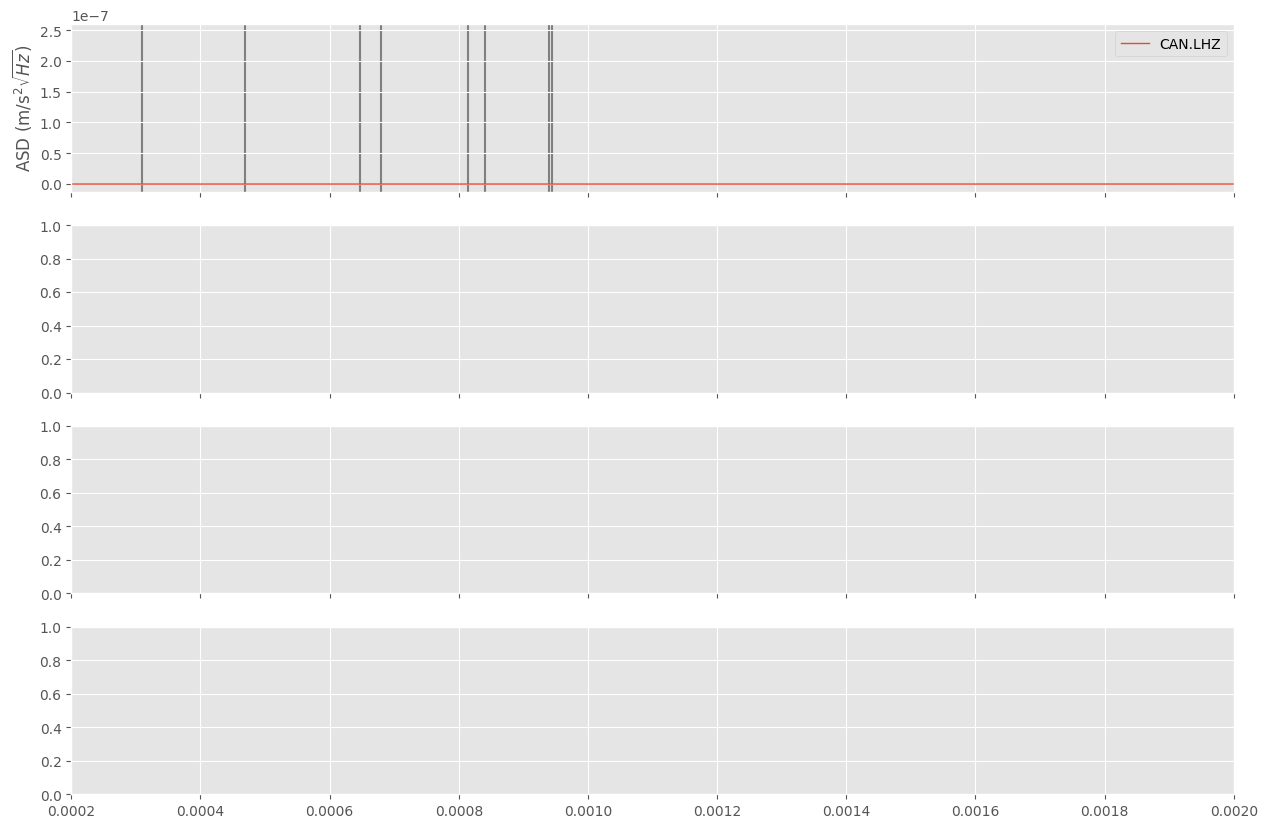

In [15]:
def __makeplot_spectra_MT(freqs, specs):

    
    time = np.linspace(0, st[0].stats.npts*st[0].stats.delta,  st[0].stats.npts)
    
    N = len(stations)
    
    fig, ax = plt.subplots(N,1, figsize=(15,10), sharex=True)

    for i, station in enumerate(stations):
        print(station)
        
        net, sta, loc, cha = station.split(".")
        
        ax[i].plot(freqs, specs[i], label=f'{sta}.{cha}', lw=1)
                  
        if cha[1] == "J":
            ax[i].set_ylabel(r"ASD (rad/s$\sqrt{Hz}$)")
        else:
            ax[i].set_ylabel(r"ASD (m/s$^2$$\sqrt{Hz}$)")

        ax[i].legend(loc="upper right")
    
        ax[i].set_xlim(0.2e-3, 2e-3)
    
        for mode in free_modes.values():
            ax[i].axvline(mode*1e-6, color='grey', zorder=0)
    
#     if event == 'kermadec':
#         ax[0].set_ylim(0, 0.0004)
#         ax[1].set_ylim(0, 0.0002)
#         ax[2].set_ylim(0, 0.0006)
#         ax[3].set_ylim(0, 0.5e-9)

#     if event == 'tohoku':
#         ax[0].set_ylim(0, 0.001)
#         ax[1].set_ylim(0, 0.001)
#         ax[2].set_ylim(0, 0.001)
#         ax[3].set_ylim(0, 1e-9)
    
    ax[N-1].set_xlabel(f"days after {st[0].stats.starttime.date} {str(st[0].stats.starttime.time)[:9]} UTC")
    
    plt.show();
    

__makeplot_spectra(freqsMT, specsMT)

## Tests

In [ ]:
from obspy import Trace

fs = 10
t = np.arange(0, 1000/fs, 1/fs)
y = 0.5*np.sin(2*np.pi*0.5*t) + 3*np.sin(2*np.pi*1*t)

sty = Stream()
tr  = Trace(y)
tr.stats.sampling_rate = fs
tr.taper(0.1)

plt.figure()
plt.plot(t,y)

sty += tr
sty[0]

specs, freqs = __make_spectra_welch(sty)
specs, freqs = __make_spectra_MT(sty, method='unity')

plt.figure()
plt.semilogy(freqs, specs[0])

In [ ]:
from pylab import grid, semilogy
from spectrum import data_cosine, speriodogram, Periodogram

num = 1
data = st[num].data
fs   = st[num].stats.sampling_rate
npts = st[num].stats.npts

from scipy.signal import welch

factor = 50
psd0 = welch(data, fs=fs, nperseg=int(4096*factor), nfft=int(4096*factor), window="hann", scaling="density")

from spectrum import WelchPeriodogram
psd = WelchPeriodogram(data, NFFT=int(4096*factor), sampling=fs); plt.close()

specs, freqs = __make_spectra_fft(st)

plt.figure()
plt.plot(psd[0][1], 20*np.log10(psd[0][0]))
plt.plot(psd0[0], 20*np.log10(psd0[1]))
plt.plot(freqs, 20*np.log10((specs[num])**2))

plt.xlim(0, 0.002)

In [ ]:
from spectrum import data_cosine, dpss, pmtm

data = data_cosine(N=1024, A=0.01, sampling=1024, freq=200)


[tapers, eigen] = dpss(1024, 3, 4)

skc,w,e = pmtm(data, e=eigen, v=tapers, show=True, method='unity')

sk = abs(skc)**2

w = np.transpose(np.ones(np.shape(sk)))

print(np.shape(w), np.shape(sk))

out = np.matmul(np.transpose(sk), np.transpose(w))
out = np.mean(np.matmul(w, sk) , axis=0)


plt.semilogy(out)


### References

* Ammon, C. J., et al. (2005), Rupture process of the 2004 Sumatra-Andaman earthquake, *Science, 308*, 1133–1139.
* Dahlen, F. A., and J. Tromp (1998), *Theoretical Global Seismology*, Princeton U. Press, Princeton, New Jersey, USA.
* Lay, T., et al. (2005), The great Sumatra-Andaman earthquake of 26 December 2004, *Science, 308*, 1127–1133.
* Ni, S., D. Helmberger, and H. Kanamori (2005), Energy radiation from the Sumatra earthquake, *Nature*, 434, 582.
* Park, J., et al. (2005), Earth’s free oscillations excited by the 26 December 2004 Sumatra Andaman earthquake, *Science, 308*, 1139–1144.
* Shearer, P. M. (2009), *Introduction to Seismology*, 2 ed., Cambridge U. Press, Cambridge, UK.
* Stein, S., and M. Wysession (2003), *An Introduction to Seismology, Earthquakes, and Earth Structure*, Blackwell, Malden, Mass., USA.